In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pickle

PREPROCESSING

In [27]:
df=pd.read_csv('sample_ml_dataset.csv')

In [28]:
df.head()

,input1,input2,output
0,51,33,0
1,92,7,0
2,14,39,0
3,71,82,1
4,60,41,1


EDA

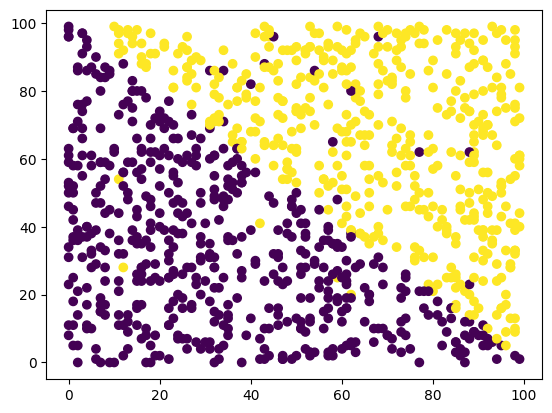

In [29]:
plt.scatter(df['input1'], df['input2'], c=df['output'])

EXTRACT INPUT AND OUTPUT COLUMNS

In [30]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

TRAIN TEST SPLIT

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1)

SCALE THE VALUES

In [38]:
scalar=StandardScaler()
X_test=scalar.fit_transform(X_test)
X_train=scalar.transform(X_train)

MODEL TRAINING

In [40]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

PREDICTION

In [41]:
Y_pred=clf.predict(X_test)

In [42]:
Y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [43]:
Y_test

880    1
813    0
682    0
694    0
701    0
      ..
36     1
655    0
751    0
175    1
743    0
Name: output, Length: 100, dtype: int64

CHECKING THE ACCURACY

In [45]:
accuracy_score(Y_test,Y_pred)

0.99

<Axes: >

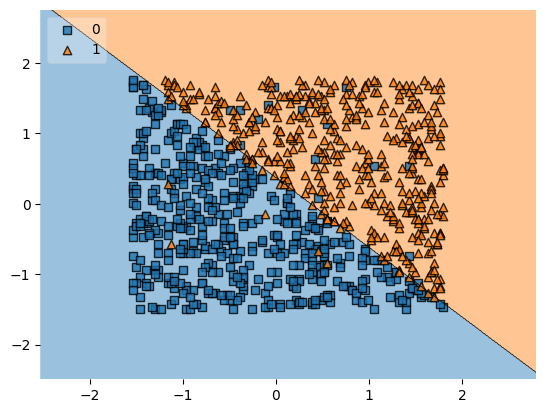

In [48]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

Deploying the Model

In [49]:
pickle.dump(clf, open('model.pkl', 'wb'))